In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def epsilon_greedy_with_decay(num_arms, num_plays, initial_epsilon, decay_rate, true_reward_probs):
  Q = np.zeros(num_arms)
  N = np.zeros(num_arms)
  rewards = []

  def pull_arm(arm):
    return np.random.rand() < true_reward_probs[arm]

  epsilon = initial_epsilon

  for t in range(num_plays):
    if np.random.rand() < epsilon:
      arm = np.random.choice(num_arms)
    else:
      arm = np.argmax(Q)

    reward = pull_arm(arm)
    rewards.append(reward)

    N[arm] += 1
    Q[arm] += (reward - Q[arm]) / N[arm]

    #Decay epsilon
    epsilon *= decay_rate

  return Q, N, rewards



In [3]:
# Defining the parameters
num_arms = 3
num_plays = 1000
initial_epsilon = 1.0
decay_rate = 0.99
true_reward_probs = [0.2, 0.5, 0.7]
num_simulations = 1000

In [4]:
# Running multiple simulations
all_Q = np.zeros((num_simulations, num_arms))
all_N = np.zeros((num_simulations, num_arms))
all_rewards = np.zeros((num_simulations, num_plays))

for i in range(num_simulations):
  Q, N, rewards = epsilon_greedy_with_decay(num_arms, num_plays, initial_epsilon, decay_rate, true_reward_probs)
  all_Q[i] = Q
  all_N[i] = N
  #calculate cumulative rewards
  all_rewards[i] = np.cumsum(rewards)

# Getting the average results
avg_Q = np.mean(all_Q, axis=0)
avg_N = np.mean(all_N, axis =0)
avg_cumulative_reward = np.mean(all_rewards, axis=0)
final_cumulative_reward = avg_cumulative_reward[-1]
best_arm_reward = max(true_reward_probs) * num_plays
avg_regret = best_arm_reward - final_cumulative_reward

# Printing the rsults

print("average Estimated values:", avg_Q)
print("average Counts :", avg_N)
print("Ffinal Cumulative Reward :", final_cumulative_reward)
print("average  Regret:", avg_regret)
print("Difference between true and average estimated values:", np.abs(true_reward_probs - avg_Q))


average Estimated values: [0.19694322 0.49204556 0.69886865]
average Counts : [ 33.64   42.883 923.477]
Ffinal Cumulative Reward : 674.292
average  Regret: 25.70799999999997
Difference between true and average estimated values: [0.00305678 0.00795444 0.00113135]


In [5]:
# Let's represent our data in a graphical way

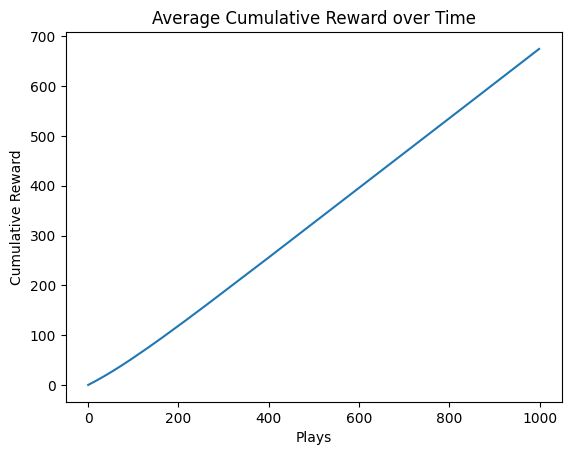

In [6]:
# Plot cumulative rewards over time
plt.plot(avg_cumulative_reward)
plt.xlabel("Plays")
plt.ylabel("Cumulative Reward")
plt.title("Average Cumulative Reward over Time")
plt.show()

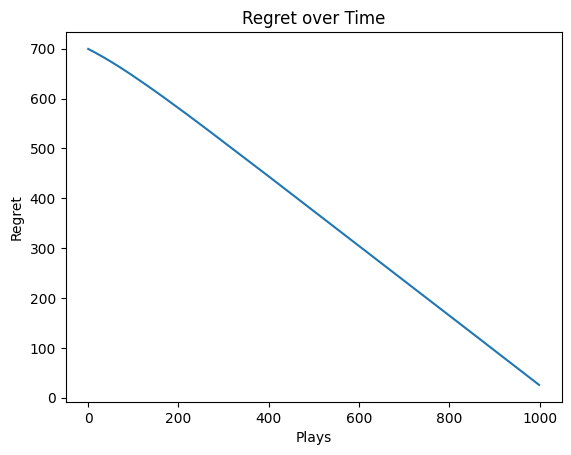

In [7]:
# Plot regret over time
regrets = best_arm_reward - avg_cumulative_reward
plt.plot(regrets)
plt.xlabel("Plays")
plt.ylabel("Regret")
plt.title("Regret over Time")
plt.show()

In [8]:
# PUTTING ALL TOGETHER

average Estimated values: [0.20050824 0.49181136 0.69968292]
average Counts : [ 33.661  40.864 925.475]
Ffinal Cumulative Reward : 674.817
average  Regret: 25.182999999999993
Difference between true and average estimated values: [0.00050824 0.00818864 0.00031708]


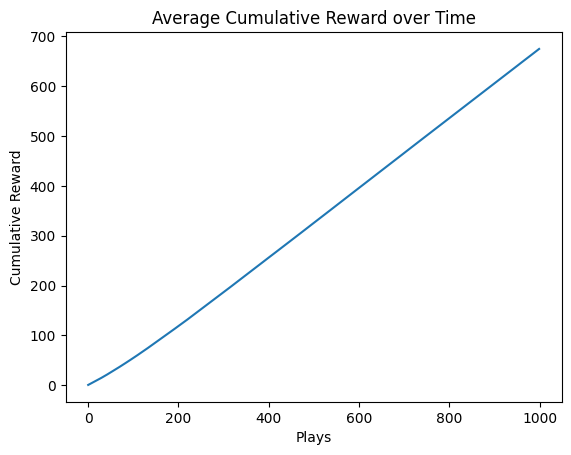

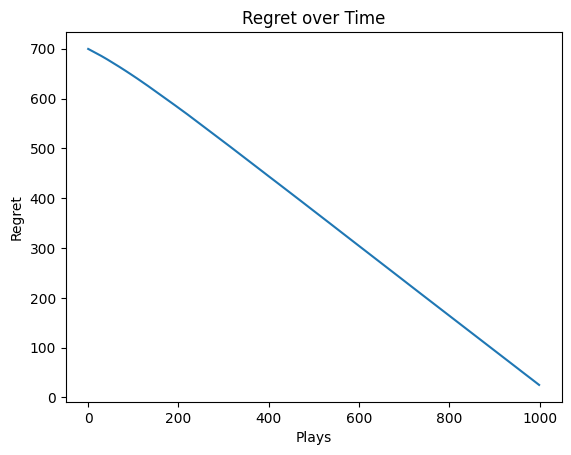

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def epsilon_greedy_with_decay(num_arms, num_plays, initial_epsilon, decay_rate, true_reward_probs):
  Q = np.zeros(num_arms)
  N = np.zeros(num_arms)
  rewards = []

  def pull_arm(arm):
    return np.random.rand() < true_reward_probs[arm]

  epsilon = initial_epsilon

  for t in range(num_plays):
    if np.random.rand() < epsilon:
      arm = np.random.choice(num_arms)
    else:
      arm = np.argmax(Q)

    reward = pull_arm(arm)
    rewards.append(reward)

    N[arm] += 1
    Q[arm] += (reward - Q[arm]) / N[arm]

    #Decay epsilon
    epsilon *= decay_rate

  return Q, N, rewards


# Defining the parameters
num_arms = 3
num_plays = 1000
initial_epsilon = 1.0
decay_rate = 0.99
true_reward_probs = [0.2, 0.5, 0.7]
num_simulations = 1000

# Running multiple simulations
all_Q = np.zeros((num_simulations, num_arms))
all_N = np.zeros((num_simulations, num_arms))
all_rewards = np.zeros((num_simulations, num_plays))

for i in range(num_simulations):
  Q, N, rewards = epsilon_greedy_with_decay(num_arms, num_plays, initial_epsilon, decay_rate, true_reward_probs)
  all_Q[i] = Q
  all_N[i] = N
  #calculate cumulative rewards
  all_rewards[i] = np.cumsum(rewards)

# Getting the average results
avg_Q = np.mean(all_Q, axis=0)
avg_N = np.mean(all_N, axis =0)
avg_cumulative_reward = np.mean(all_rewards, axis=0)
final_cumulative_reward = avg_cumulative_reward[-1]
best_arm_reward = max(true_reward_probs) * num_plays
avg_regret = best_arm_reward - final_cumulative_reward

# Printing the rsults

print("average Estimated values:", avg_Q)
print("average Counts :", avg_N)
print("Ffinal Cumulative Reward :", final_cumulative_reward)
print("average  Regret:", avg_regret)
print("Difference between true and average estimated values:", np.abs(true_reward_probs - avg_Q))


# Plot cumulative rewards over time
plt.plot(avg_cumulative_reward)
plt.xlabel("Plays")
plt.ylabel("Cumulative Reward")
plt.title("Average Cumulative Reward over Time")
plt.show()


# Plot regret over time
regrets = best_arm_reward - avg_cumulative_reward
plt.plot(regrets)
plt.xlabel("Plays")
plt.ylabel("Regret")
plt.title("Regret over Time")
plt.show()

This code implements an **epsilon-greedy algorithm with decay** for the multi-armed bandit (MAB) problem. Here's a detailed explanation of its components and functionality:

---

### **Step-by-Step Explanation**

#### **1. Import Statements**
```python
import numpy as np
import matplotlib.pyplot as plt
```
- **`numpy`**: Used for numerical operations and random number generation.
- **`matplotlib.pyplot`**: Used for plotting results (cumulative rewards and regret over time).

---

### **2. Function: `epsilon_greedy_with_decay`**
```python
def epsilon_greedy_with_decay(num_arms, num_plays, initial_epsilon, decay_rate, true_reward_probs):
  Q = np.zeros(num_arms)
  N = np.zeros(num_arms)
  rewards = []
```
- **Inputs:**
  - `num_arms`: Number of arms (actions).
  - `num_plays`: Total number of interactions with the arms.
  - `initial_epsilon`: Initial probability of exploration.
  - `decay_rate`: Factor by which `epsilon` decreases after every play.
  - `true_reward_probs`: True probabilities of getting a reward for each arm.
- **Variables:**
  - `Q`: Estimated values of each arm (initialized to 0).
  - `N`: Number of times each arm has been pulled (initialized to 0).
  - `rewards`: List to track all rewards obtained during the plays.

```python
  def pull_arm(arm):
    return np.random.rand() < true_reward_probs[arm]
```
- **`pull_arm(arm)`**:
  - Simulates pulling an arm.
  - Returns `True` (reward) if a randomly generated number is less than the arm's true reward probability.

```python
  epsilon = initial_epsilon
```
- Initialize `epsilon` with the given starting value.

---

#### **3. Main Loop: Playing the Game**
```python
  for t in range(num_plays):
    if np.random.rand() < epsilon:
      arm = np.random.choice(num_arms)
    else:
      arm = np.argmax(Q)
```
- At each play `t`:
  - With probability `epsilon`, **explore** by randomly selecting an arm.
  - Otherwise, **exploit** by selecting the arm with the highest estimated value (`np.argmax(Q)`).

```python
    reward = pull_arm(arm)
    rewards.append(reward)
```
- Simulate pulling the selected arm and record the obtained reward.

```python
    N[arm] += 1
    Q[arm] += (reward - Q[arm]) / N[arm]
```
- **Update the statistics**:
  - Increment the pull count for the chosen arm (`N[arm]`).
  - Update the estimated value `Q[arm]` using the running mean formula:
    \[
    Q[arm] = Q[arm] + \frac{(\text{reward} - Q[arm])}{N[arm]}
    \]

```python
    epsilon *= decay_rate
```
- Decay `epsilon` after every play:
  - This gradually reduces the probability of exploration over time.

---

#### **4. Returning Results**
```python
  return Q, N, rewards
```
- Returns:
  - `Q`: Final estimated values of each arm.
  - `N`: Total number of times each arm was pulled.
  - `rewards`: List of rewards obtained in each play.

---

### **5. Running Multiple Simulations**
```python
num_arms = 3
num_plays = 1000
initial_epsilon = 1.0
decay_rate = 0.99
true_reward_probs = [0.2, 0.5, 0.7]
num_simulations = 1000
```
- Parameters:
  - 3 arms with true reward probabilities `[0.2, 0.5, 0.7]`.
  - Play 1000 rounds per simulation.
  - Start with `epsilon = 1.0` (pure exploration initially) and decay it by `0.99` after each play.
  - Run the algorithm for 1000 independent simulations.

```python
all_Q = np.zeros((num_simulations, num_arms))
all_N = np.zeros((num_simulations, num_arms))
all_rewards = np.zeros((num_simulations, num_plays))
```
- Arrays to store results across simulations:
  - `all_Q`: Stores the final estimated values (`Q`) for each simulation.
  - `all_N`: Stores the total pulls (`N`) for each arm across simulations.
  - `all_rewards`: Tracks cumulative rewards for each play and simulation.

```python
for i in range(num_simulations):
  Q, N, rewards = epsilon_greedy_with_decay(num_arms, num_plays, initial_epsilon, decay_rate, true_reward_probs)
  all_Q[i] = Q
  all_N[i] = N
  all_rewards[i] = np.cumsum(rewards)
```
- Run the algorithm for each simulation and record:
  - Final estimated values (`Q`).
  - Total pulls (`N`).
  - Cumulative rewards (using `np.cumsum` to sum rewards progressively).

---

### **6. Analyzing Results**
```python
avg_Q = np.mean(all_Q, axis=0)
avg_N = np.mean(all_N, axis=0)
avg_cumulative_reward = np.mean(all_rewards, axis=0)
final_cumulative_reward = avg_cumulative_reward[-1]
```
- Compute averages:
  - `avg_Q`: Average estimated values for each arm.
  - `avg_N`: Average number of times each arm was pulled.
  - `avg_cumulative_reward`: Average cumulative reward over all plays.
  - `final_cumulative_reward`: The cumulative reward at the end of the plays.

```python
best_arm_reward = max(true_reward_probs) * num_plays
avg_regret = best_arm_reward - final_cumulative_reward
```
- **Best possible reward**: If the best arm was always selected:
  \[
  \text{best\_arm\_reward} = \text{max(true\_reward\_probs)} \times \text{num\_plays}
  \]
- **Regret**: Loss due to suboptimal decisions:
  \[
  \text{avg\_regret} = \text{best\_arm\_reward} - \text{final\_cumulative\_reward}
  \]

```python
print("average Estimated values:", avg_Q)
print("average Counts :", avg_N)
print("Final Cumulative Reward :", final_cumulative_reward)
print("average Regret:", avg_regret)
print("Difference between true and average estimated values:", np.abs(true_reward_probs - avg_Q))
```
- Prints key metrics:
  - Average estimated values (`avg_Q`).
  - Average pull counts (`avg_N`).
  - Final cumulative reward and average regret.
  - Absolute differences between true probabilities and estimated values.

---

### **7. Plotting Results**
#### Cumulative Rewards
```python
plt.plot(avg_cumulative_reward)
plt.xlabel("Plays")
plt.ylabel("Cumulative Reward")
plt.title("Average Cumulative Reward over Time")
plt.show()
```
- Visualizes how cumulative rewards increase over time.

#### Regret Over Time
```python
regrets = best_arm_reward - avg_cumulative_reward
plt.plot(regrets)
plt.xlabel("Plays")
plt.ylabel("Regret")
plt.title("Regret over Time")
plt.show()
```
- Visualizes how regret evolves as the algorithm learns to favor the best arm.

---

### **Key Insights**
1. **Exploration vs. Exploitation**:
   - High initial `epsilon` ensures broad exploration early on.
   - Decay gradually shifts focus to exploitation, reducing regret over time.

2. **Regret**:
   - Initially high due to exploration but decreases as the algorithm converges on the best arm.

3. **Visualization**:
   - Cumulative rewards show how well the algorithm performs over time.
   - Regret provides insight into the algorithm's efficiency in learning the optimal policy.